# DIP Assignment 3

Arghya Roy (2021115008)

imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import time
import cv2
from tqdm import tqdm

## Question 1

### 1.1

Write a function `dft1` that calculates the DFT of 1D array of arbritrary size. Now use this function to decode the frequencies in the given audio file `1.wav` and plot the frequency vs magnitude graph. 

Note: You may use librosa library to read the wav file.

In [ ]:
filename = '../data/1.wav'

audio1, sr = librosa.load(filename)

In [2]:
# def dft1(x):
#     N = len(x)
#     X = np.zeros(N, dtype=complex)
#     for k in tqdm(range(N)):
#         X[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(N) / N))
#     return X

def dft1(x, twiddle_factors):
    """
    Compute the 1D DFT of a given array using precomputed twiddle factors.

    Parameters:
    x (np.ndarray): Input 1D array.
    twiddle_factors (np.ndarray): Precomputed exponential terms.

    Returns:
    np.ndarray: DFT of the input array.
    """
    return np.array([np.sum(x * twiddle_factors[k]) for k in range(len(x))], dtype=complex)

100%|██████████| 110250/110250 [19:21<00:00, 94.89it/s] 


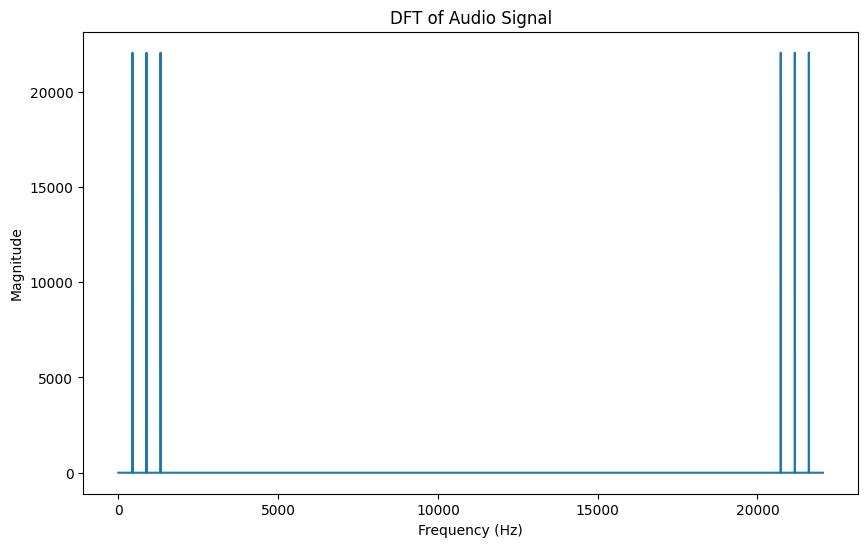

In [241]:
# N = len(y)
# twiddle_factors = np.exp(-2j * np.pi * np.outer(np.arange(N), np.arange(N)) / N)

# Perform DFT
# Y = dft1(y, twiddle_factors)

audio1dft = dft1(audio1)

N = len(audio1)
freq = np.arange(N) / N * sr

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(audio1dft))  # Only plot up to the Nyquist frequency
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT of Audio Signal')
plt.show()

### 1.2

Write a function `dft2` that calculates the 2D-DFT of a 2D array, using `dft1`.

In [3]:
# def dft2(x):
    # M, N = x.shape
    # X = np.zeros((M, N), dtype=complex)

    # for m in range(M):
    #     X[m, :] = dft1(x[m, :])

    # for n in range(N):
    #     X[:, n] = dft1(X[:, n])

    # return X

def dft2(x):

    M, N = x.shape
    row_twiddle_factors = np.exp(-2j * np.pi * np.arange(N)[:, None] * np.arange(N) / N)
    col_twiddle_factors = np.exp(-2j * np.pi * np.arange(M)[:, None] * np.arange(M) / M)

    X = np.zeros((M, N), dtype=complex)
    for m in tqdm(range(M), desc="Row-wise DFT"):
        X[m, :] = dft1(x[m, :], row_twiddle_factors)

    for n in tqdm(range(N), desc="Column-wise DFT"):
        X[:, n] = dft1(X[:, n], col_twiddle_factors)

    return X

### 1.3

Write a function `fft1` that computes the DFT of a 1D array using the FFT algorithm (you may pad the array with extra values to make its length a power of 2)

In [7]:

def fft1(x):
  
  N = len(x)
  
  # padding
  next_power_of_2 = 2**(int(np.ceil(np.log2(N))))
  x_padded = np.pad(x, (0, next_power_of_2 - N), 'constant')

  # recursion
  def rec(x):
    n = len(x)
    if n == 1:
      return x
    else:
      even = rec(x[0::2])
      odd = rec(x[1::2])
      factor = np.exp(-2j * np.pi * np.arange(n) / n)
      return np.concatenate([even + factor[:n//2] * odd, even + factor[n//2:] * odd])

  X = rec(x_padded)
  return X[:N]  # only the coefficients for the original length


### 1.4

Write a function `fft2` that computes the 2D-DFT of a 2D array using `fft1` and handle the padding.

In [12]:

def fft2(x):

  M, N = x.shape

  # padding
  next_power_of_2_M = 2**(int(np.ceil(np.log2(M))))
  next_power_of_2_N = 2**(int(np.ceil(np.log2(N))))
  x_padded = np.pad(x, ((0, next_power_of_2_M - M), (0, next_power_of_2_N - N)), 'constant')

  
  X = np.zeros(x_padded.shape, dtype=complex)
  for i in range(next_power_of_2_M):
    X[i, :] = fft1(x_padded[i, :])
  for j in range(next_power_of_2_N):
    X[:, j] = fft1(X[:, j])

  return X[:M, :N]


### 1.5

Compute the DFT of arrays of different lengths: $[128, 256, 512, 1024]$ using `dft1` , repeat the same using `fft1`. Make a plot of the Time Taken vs length of array and comment on the observed differences.

100%|██████████| 1024/1024 [00:00<00:00, 12048.41it/s]


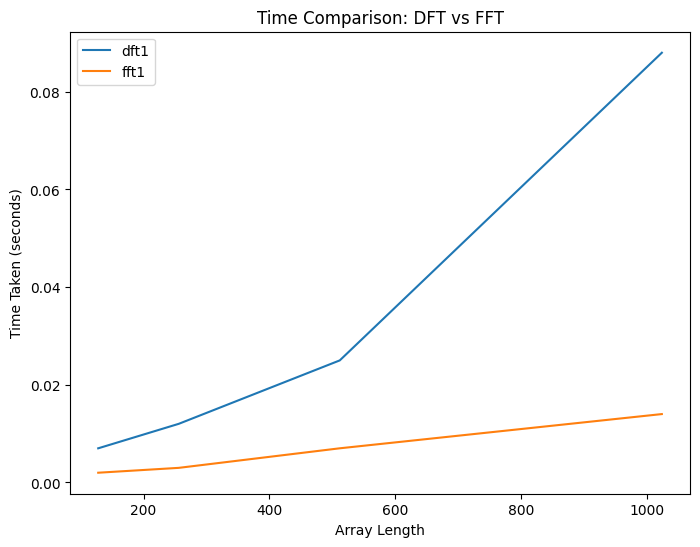

In [ ]:
array_lengths = [128, 256, 512, 1024]

dft_times = []
fft_times = []

for N in array_lengths:
  x = np.random.rand(N)

  start_time = time.time()
  dft1(x)
  end_time = time.time()
  dft_times.append(end_time - start_time)

  start_time = time.time()
  fft1(x)
  end_time = time.time()
  fft_times.append(end_time - start_time)

plt.figure(figsize=(8, 6))
plt.plot(array_lengths, dft_times, label='dft1')
plt.plot(array_lengths, fft_times, label='fft1')
plt.xlabel('Array Length')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Comparison: DFT vs FFT')
plt.legend()
plt.show()

Observations

- The time taken by both the functions increases with the length of the array.
- The time taken by `dft1` increases at a much faster rate than `fft1`.
- The time taken by `fft1` is much less than `dft1` for larger arrays.
- The time taken by `fft1` is always less than `dft1` for all array lengths.

These observations make sense as the FFT algorithm has a time complexity of $O(n\log n)$ while the DFT algorithm has a time complexity of $O(n^2)$.


### 1.6

Compute the 2D-DFT and 2D-FFT of the following image signals and display the outputs:
1. $I =0.5(1+\sin{x})$
2. $I = 0.5(1+\sin{x}\sin{y})$
3. $I = 0.5(1+\sin{x^2} +y^2)$

In [117]:
def shifting(X):
    M, N = X.shape
    # Swap quadrants
    X_shifted = np.zeros_like(X, dtype=complex)
    X_shifted[:M//2, :N//2] = X[M//2:, N//2:]   # Bottom-right to top-left
    X_shifted[M//2:, N//2:] = X[:M//2, :N//2]   # Top-left to bottom-right
    X_shifted[:M//2, N//2:] = X[M//2:, :N//2]   # Bottom-left to top-right
    X_shifted[M//2:, :N//2] = X[:M//2, N//2:]   # Top-right to bottom-left
    return X_shifted



In [ ]:
x = np.linspace(-np.pi, np.pi, 256)
y = np.linspace(-np.pi, np.pi, 256)
X, Y = np.meshgrid(x, y)

I1 = 0.5 * (1 + np.sin(X))
I2 = 0.5 * (1 + np.sin(X) * np.sin(Y))
I3 = 0.5 * (1 + np.sin(X**2) + Y**2)

I1_dft = shifting(dft2(I1))
I2_dft = shifting(dft2(I2))
I3_dft = shifting(dft2(I3))

I1_fft = shifting(fft2(I1))
I2_fft = shifting(fft2(I2))
I3_fft = shifting(fft2(I3))

Column-wise DFT: 100%|██████████| 256/256 [00:00<00:00, 622.48it/s]


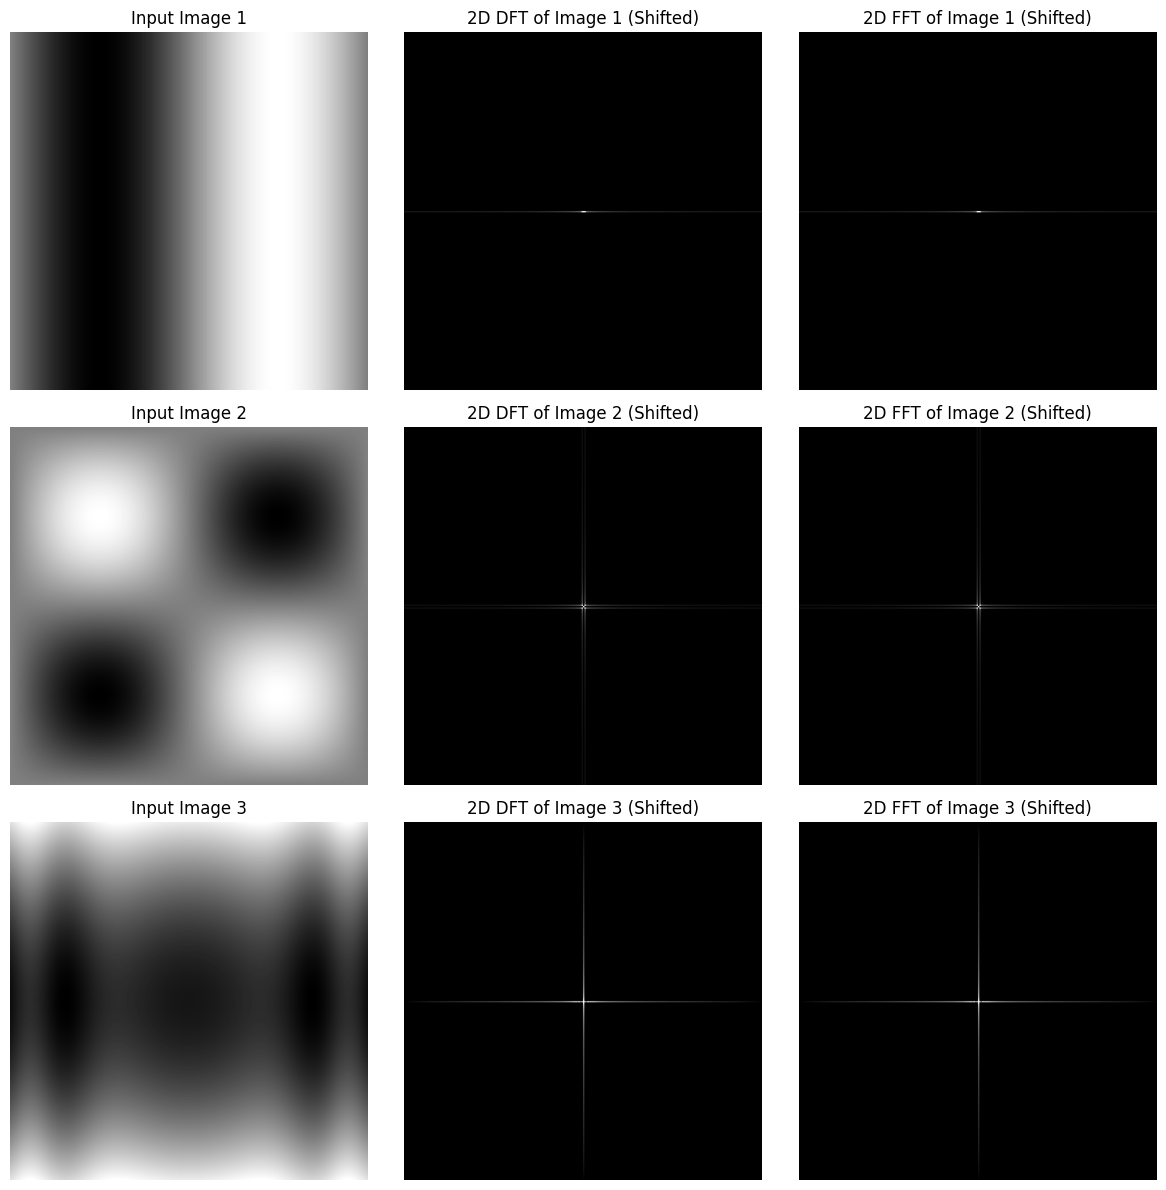

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.imshow(I1, cmap='gray')
plt.title('Input Image 1')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(np.log(1 + np.abs(I1_dft)), cmap='gray')
plt.title('2D DFT of Image 1 (Shifted)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(np.log(1 + np.abs(I1_fft)), cmap='gray')
plt.title('2D FFT of Image 1 (Shifted)')
plt.axis('off')

# Image 2 DFT and FFT
plt.subplot(3, 3, 4)
plt.imshow(I2, cmap='gray')
plt.title('Input Image 2')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(np.log(1 + np.abs(I2_dft)), cmap='gray')
plt.title('2D DFT of Image 2 (Shifted)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(np.log(1 + np.abs(I2_fft)), cmap='gray')
plt.title('2D FFT of Image 2 (Shifted)')
plt.axis('off')

# Image 3 DFT and FFT
plt.subplot(3, 3, 7)
plt.imshow(I3, cmap='gray')
plt.title('Input Image 3')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(np.log(1 + np.abs(I3_dft)), cmap='gray')
plt.title('2D DFT of Image 3 (Shifted)')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(np.log(1 + np.abs(I3_fft)), cmap='gray')
plt.title('2D FFT of Image 3 (Shifted)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 1.7

Compute the 2D-DFT of `img1.jpg` and display the output. Then, apply the 2D DFT again to the result and display the final output. Provide comments on your observations.

Column-wise DFT: 100%|██████████| 1500/1500 [01:00<00:00, 24.89it/s]


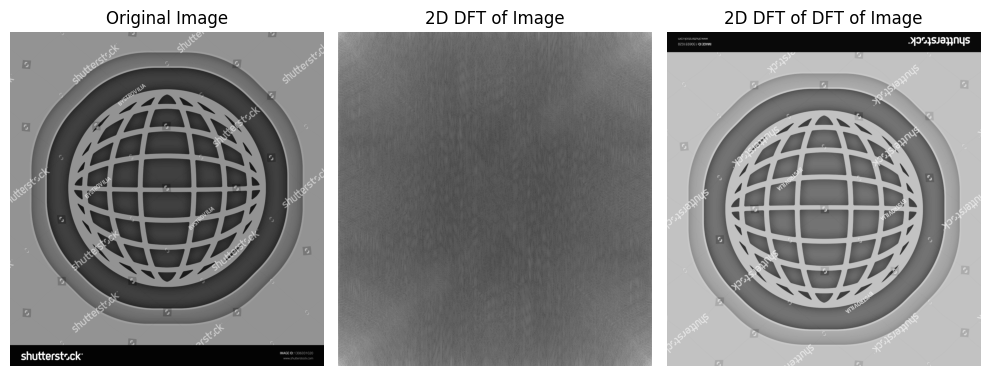

In [4]:

img1 = cv2.imread('../data/img1.jpg', cv2.IMREAD_GRAYSCALE)

dft_img1 = dft2(img1)
dft_dft_img1 = dft2(dft_img1)

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(dft_img1)), cmap='gray')
plt.title('2D DFT of Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + np.abs(dft_dft_img1)), cmap='gray')
plt.title('2D DFT of DFT of Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Observations

- The 2D-DFT of the 2D-DFT of the image is the same as the original image but in a different orientation.

## Question 2

### 1

Reconstruct the decoded frequency spectrum of 1.wav by writing a function `ifft1` and plot (1) original signal, (2) frequency spectrum from question 1 and (3) the decoded signal

In [9]:

def ifft1(X):
    N = len(X)
    
    # padding to next power of 2
    next_power_of_2 = 2**(int(np.ceil(np.log2(N))))
    X_padded = np.pad(X, (0, next_power_of_2 - N), 'constant')

    # recursion
    def rec(X):
        n = len(X)
        if n == 1:
            return X
        else:
            even = rec(X[0::2])
            odd = rec(X[1::2])
            factor = np.exp(2j * np.pi * np.arange(n) / n)  # Note the positive sign for IFFT
            return np.concatenate([even + factor[:n//2] * odd, even + factor[n//2:] * odd])

    x = rec(X_padded) / len(X_padded)
    return x[:N]




C:\Users\ARGHYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


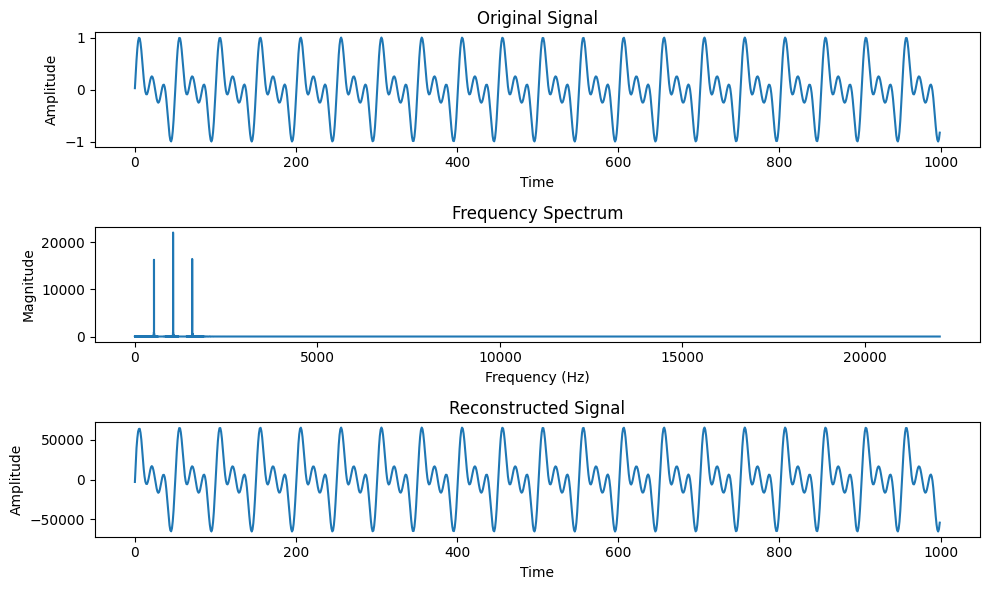

In [210]:
y, sr = librosa.load('../data/1.wav')

N = len(y)
freq = np.arange(N) / N * sr

audio1fft = fft1(y)
# audio1fft = np.fft.fft(y)
y_reconstructed = ifft1(audio1fft)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y[:1000])
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(freq, np.abs(audio1fft))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.plot(y_reconstructed[:1000])
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### 2

Write a function `ifft2` to compute the 2D inverse fourier transform of a 2D array and use it to reconstruct `img1.jpg` from fourier spectrum. Plot the (1) original image, (2) it’s fourier transform from question 1 (3) reconstructed image.
 

In [10]:
def ifft2(X):
    M, N = X.shape

    # along rows
    X_inv_rows = np.zeros_like(X, dtype=complex)
    for i in range(M):
        X_inv_rows[i, :] = ifft1(X[i, :])

    # along columns
    X_inv = np.zeros_like(X_inv_rows, dtype=complex)
    for j in range(N):
        X_inv[:, j] = ifft1(X_inv_rows[:, j])

    return np.real(X_inv) / (M * N)

In [ ]:
img1 = cv2.imread('../data/img1.jpg', cv2.IMREAD_GRAYSCALE)

img1 = img1.astype(np.float64)
img1 = cv2.resize(img1, (1024, 1024), interpolation=cv2.INTER_AREA)

fft_img1 = fft2(img1)
# fft_img1_check = np.fft.fft2(img1)

img1_reconstructed = ifft2(fft_img1)
# img1_rec_check = np.fft.ifft2(fft_img1_check)


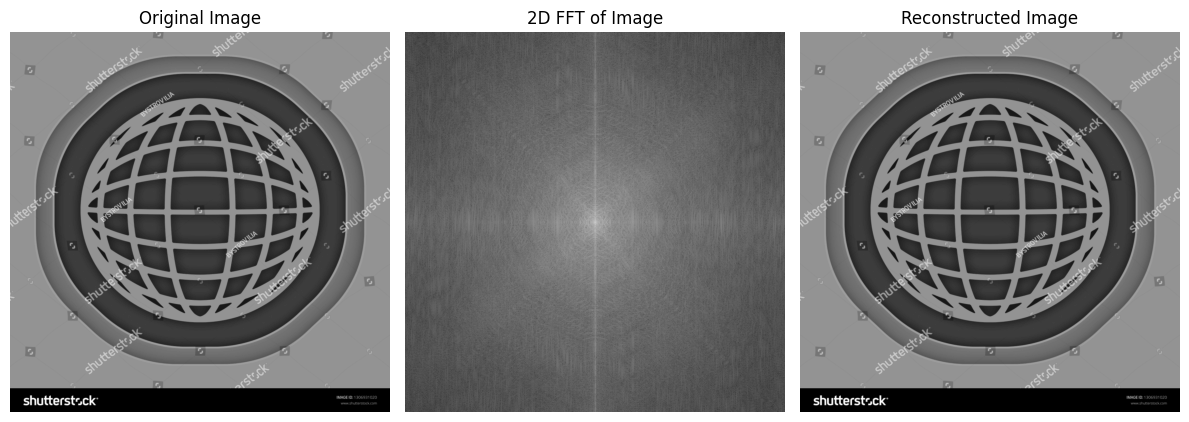

In [228]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(shifting(fft_img1))), cmap='gray')
# plt.imshow(np.log(1 + np.abs(shifting(fft_img1_check))), cmap='gray')
plt.title('2D FFT of Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.real(img1_reconstructed), cmap='gray')
# plt.imshow(np.real(img1_rec_check), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### 3

Compute the 2D FFT of `ein.jpg` and plot the phase and magnitude along with the original image side by side.

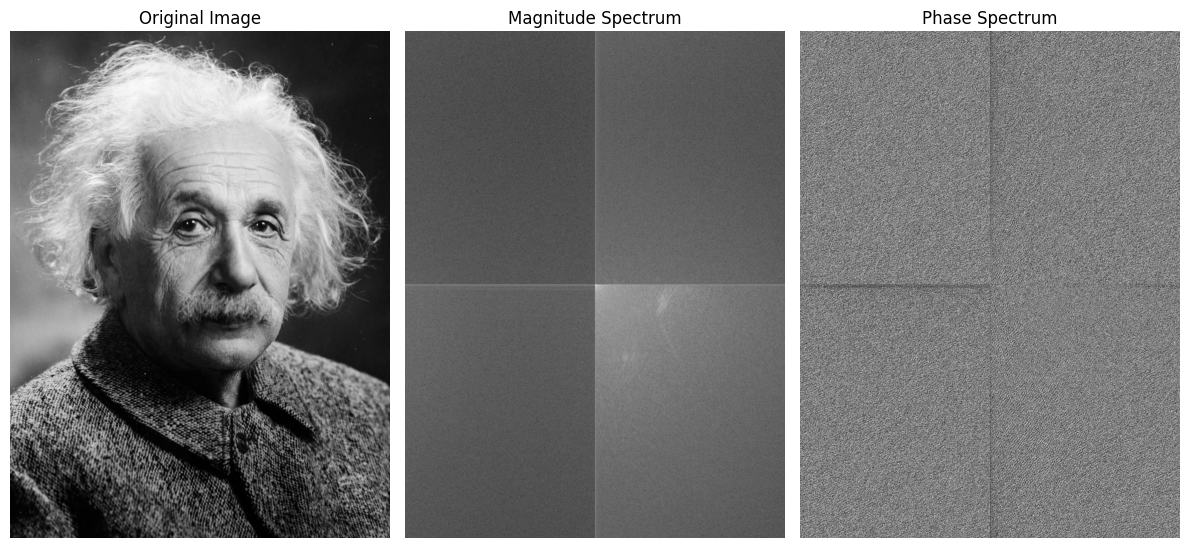

In [22]:
ein = cv2.imread('../data/ein.jpeg', cv2.IMREAD_GRAYSCALE)

fft_ein = fft2(ein)
fft_ein_shifted = np.fft.fftshift(fft_ein)

ein_mag = np.abs(fft_ein_shifted)
ein_phase = np.angle(fft_ein_shifted)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(ein, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + ein_mag), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ein_phase, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

### 4

Now, replace the phase spectrum with a random phase, while keeping the magnitude spectrum unchanged. Then plot (1) The magnitude spectrum, (2) The new random phase, (3) The unchanged magnitude spectrum combined with the random phase, (4) The Inverse Fourier Transform of the combined plot.

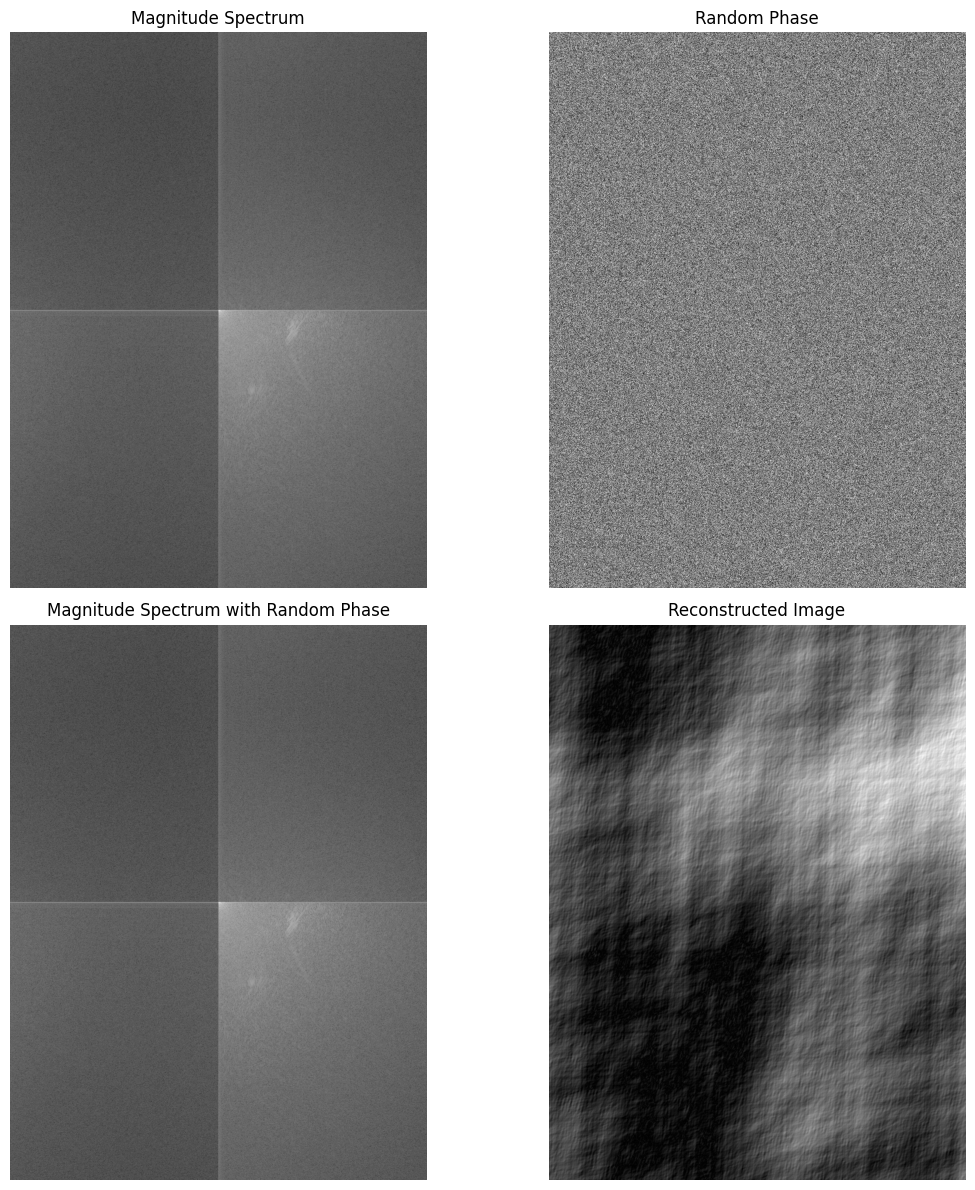

In [23]:
random_phase = np.random.uniform(0, 2 * np.pi, ein_phase.shape)
fft_ein_random_phase = ein_mag * np.exp(1j * random_phase)

fft_ein_random_phase_shifted = np.fft.ifftshift(fft_ein_random_phase)
ein_random_phase = np.abs(ifft2(fft_ein_random_phase_shifted))

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(np.log(1 + ein_mag), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(random_phase, cmap='gray')
plt.title('Random Phase')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log(1 + np.abs(fft_ein_random_phase)), cmap='gray')
plt.title('Magnitude Spectrum with Random Phase')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(ein_random_phase, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### 5

Now, replace the magnitude spectrum with a constant magnitude while keeping the phase spectrum unchanged. Keep the value of the magnitude equal to the mean of original magnitude spectrum. Then plot (1) The new constant magnitude spectrum, (2) The unchanged phase spectrum, (3) The constant magnitude combined with the unchanged phase, (4) The Inverse Fourier Transform of the combined plot.

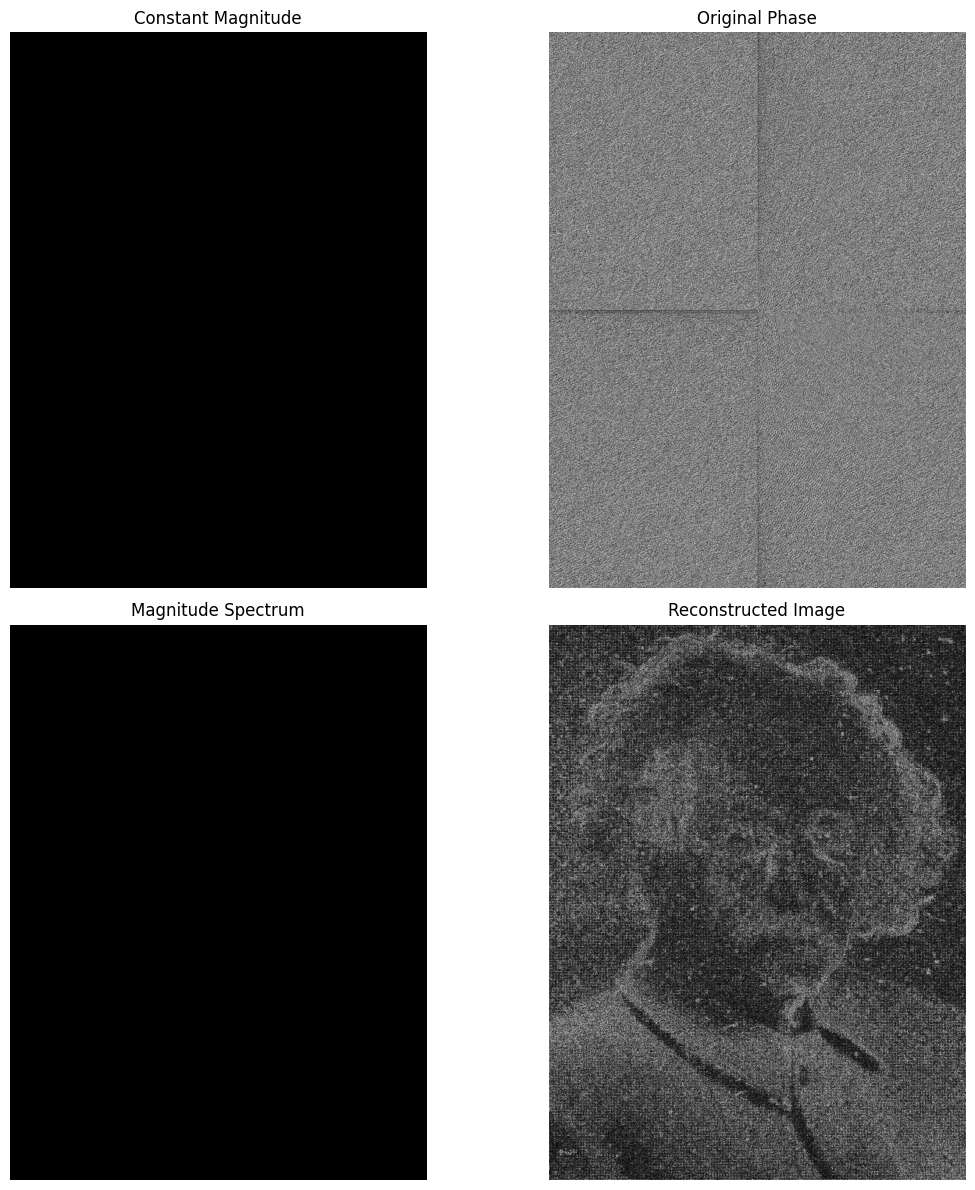

In [53]:
constant_mag = np.mean(ein_mag) * np.ones_like(ein_mag)
fft_ein_constant_mag = constant_mag * np.exp(1j * ein_phase)

fft_ein_constant_mag_shifted = np.fft.ifftshift(fft_ein_constant_mag)

ein_constant_mag = np.abs(ifft2(fft_ein_constant_mag_shifted))

ein_constant_mag = (
    ((ein_constant_mag - np.min(ein_constant_mag)) / np.max(ein_constant_mag)) * 255
).astype(np.uint8)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(np.log(1 + constant_mag), cmap="gray")
plt.title("Constant Magnitude")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(ein_phase, cmap="gray")
plt.title("Original Phase")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(fft_ein_constant_mag)), cmap="gray")
plt.title("Magnitude Spectrum")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(25 * ein_constant_mag, cmap="gray")
plt.title("Reconstructed Image")
plt.axis("off")

plt.tight_layout()
plt.show()

## Question 3

Vansh is trying to mark his attendance for the DIP class using a fingerprint scanner. However, because he is in hurry to leave the class, the fingerprint got smudged making it difficult for the system to process his attendance. As a student of DIP, your task is to help Vansh by cleaning the image `fingerprint.png`.

Hint: Can explore Lowpass and Highpass Filters

I tried three approaches to clean the image:

1. Highpass Filter (spatial domain using Gaussian) + Thresholding
2. Highpass Filter (frequency domain using manual donut shaped mask) + Thresholding
3. Highpass Filter (frequency domain using Butterworth filter) + Thresholding

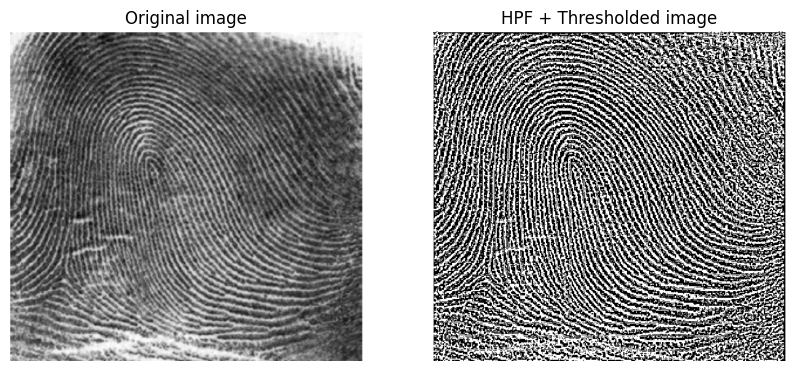

In [11]:
fingerprint = cv2.imread('../data/fingerprint.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# high-pass filter
fingerprint_hpf = fingerprint - cv2.GaussianBlur(fingerprint, (0, 0), 1)

# thresholding
fingerprint_hpf_thr = (fingerprint_hpf > 0).astype(np.float32)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(fingerprint, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fingerprint_hpf_thr, cmap='gray')
plt.title('HPF + Thresholded image')
plt.axis('off')

plt.show()

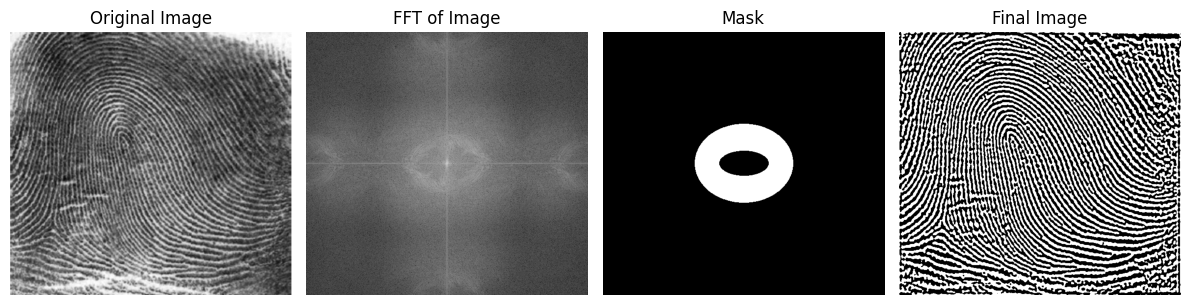

In [ ]:
fingerprint = cv2.imread('../data/fingerprint.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

fft_fingerprint = np.fft.fft2(fingerprint)

fft_fingerprint_shifted = np.fft.fftshift(fft_fingerprint)

rows, cols = fingerprint.shape
crow, ccol = rows // 2, cols // 2
# donut-shaped mask
mask = np.zeros((rows, cols), np.uint8)
cv2.ellipse(mask, (ccol, crow), (100, 80), 0, 0, 360, 1, -1)
cv2.ellipse(mask, (ccol, crow), (50, 25), 0, 0, 360, 0, -1)
mask = mask / 255.0

fft_fingerprint_masked = fft_fingerprint_shifted * mask

# shift back
fft_fingerprint_masked_shifted = np.fft.ifftshift(fft_fingerprint_masked)

fingerprint_ifft = np.fft.ifft2(fft_fingerprint_masked_shifted).real

fingerprint_ifft_8bit = cv2.normalize(fingerprint_ifft, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# thresholding
fingerprint_ifft_thr = cv2.threshold(fingerprint_ifft_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(fingerprint, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(fft_fingerprint))), cmap='gray')
plt.title('FFT of Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(fingerprint_ifft_thr, cmap='gray')
plt.title('Final Image')
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\ARGHYA\AppData\Local\Temp\ipykernel_20788\2187745631.py:13: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2 * n))


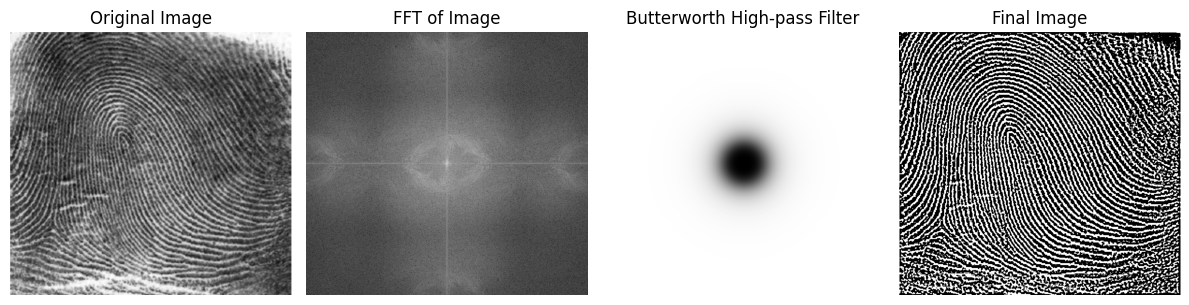

In [51]:
def butterworth_highpass_filter(shape, D0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2

    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)

    D = np.sqrt(X**2 + Y**2)

    H = 1 / (1 + (D0 / D)**(2 * n))

    return H

fingerprint = cv2.imread('../data/fingerprint.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

fft_fingerprint = np.fft.fft2(fingerprint)

fft_fingerprint_shifted = np.fft.fftshift(fft_fingerprint)

rows, cols = fingerprint.shape

D0 = 50
n = 2
H = butterworth_highpass_filter(fingerprint.shape, D0, n)

fft_fingerprint_filtered = fft_fingerprint_shifted * H

# shift back
fft_fingerprint_filtered_shifted = np.fft.ifftshift(fft_fingerprint_filtered)

fingerprint_ifft = np.fft.ifft2(fft_fingerprint_filtered_shifted).real

fingerprint_ifft_8bit = cv2.normalize(fingerprint_ifft, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# thresholding
fingerprint_ifft_thr = cv2.threshold(fingerprint_ifft_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(fingerprint, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(fft_fingerprint))), cmap='gray')
plt.title('FFT of Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(H, cmap='gray')
plt.title('Butterworth High-pass Filter')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(fingerprint_ifft_thr, cmap='gray')
plt.title('Final Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## Question 4

Vansh is facing a frustrating issue: due to his poor internet connection, images on his machine are being rendered in low resolution, making it hard for him to enjoy a clear view. As a solution, you are tasked with writing a code that can enhance the resolution of `google.jpeg` and restores its clarity.

Hint: Can explore Lowpass and Highpass Filters

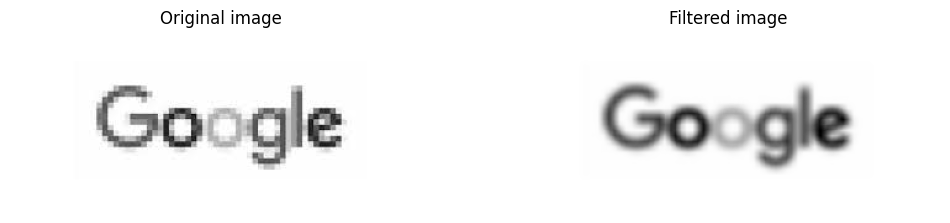

In [ ]:
google = cv2.imread('../data/google.jpeg', cv2.IMREAD_GRAYSCALE).astype(np.float32)

google_blur = cv2.GaussianBlur(google, (9, 9), 11)

google_hpf = 0.1 * google + 0.9 * google_blur

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(google, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(google_hpf, cmap='gray')
plt.title('Filtered image')
plt.axis('off')

plt.show()


## Question 5

Vansh recently captured a photograph on his phone, but due to some unintended artifacts introduced during the capture process, the quality of the image has been compromised. Being an amateur photographer, Vansh is disappointed with the imperfections obscuring the beauty of the image. You are his last hope to restore the photograph to its original splendour!

Using the techniques you have learned in your DIP course, identify and remove the artifacts from the `bird.png` and `cart.jpg` to reveal the underlying scene. Explain the approach and steps you would take to restore the image and discuss the specific image processing techniques involved in correcting such issues.

Steps:

1. Apply FFT to move the image to the frequency domain and shift low frequencies to the center.

3. Create a binary mask by setting high-magnitude frequencies to `1`, isolating artifact regions.

4. Invert the mask so artifacts are `0`, leaving the rest as `1`.

5. Set the central region in the mask to `1` to retain essential low-frequency details.

6. Multiply the inverted mask with the frequency-shifted image to suppress artifact frequencies.

7. Use inverse FFT to shift frequencies back and reconstruct the image in the spatial domain.


### bird

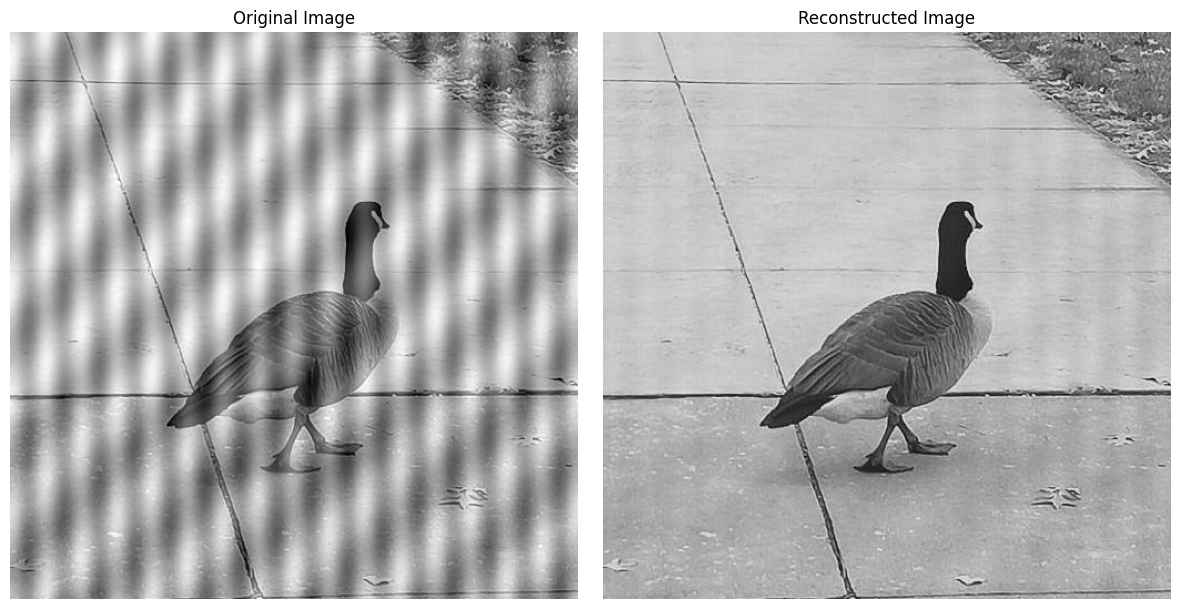

In [ ]:
bird = cv2.imread('../data/bird.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# 1. fft
fft_bird = np.fft.fft2(bird)
fshift_bird = np.fft.fftshift(fft_bird)
# plt.imshow(np.log(1 + np.abs(fshift_bird)), cmap='gray')

# 2. thresholding
bird_thr = (np.abs(fshift_bird) > 1210121).astype(np.float32)
# plt.imshow(bird_thr, cmap='gray')

# 3. invert
bird_thr_inv = 1 - bird_thr
# plt.imshow(bird_thr_inv, cmap='gray')

# 4. some center points should be white
c_x, c_y = bird_thr.shape[0] // 2, bird_thr.shape[1] // 2
bird_thr_inv[c_x - 1:c_x + 2, c_y - 1:c_y + 2] = 1
# plt.imshow(bird_thr_inv, cmap='gray')

# 5. apply this as mask
mask = bird_thr_inv
fshift_bird_masked = fshift_bird * mask

# 6. ifft
f_ishift_bird = np.fft.ifftshift(fshift_bird_masked)
bird_reconstructed = np.fft.ifft2(f_ishift_bird).real
# plt.imshow(bird_reconstructed, cmap='gray')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(bird, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bird_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


cart

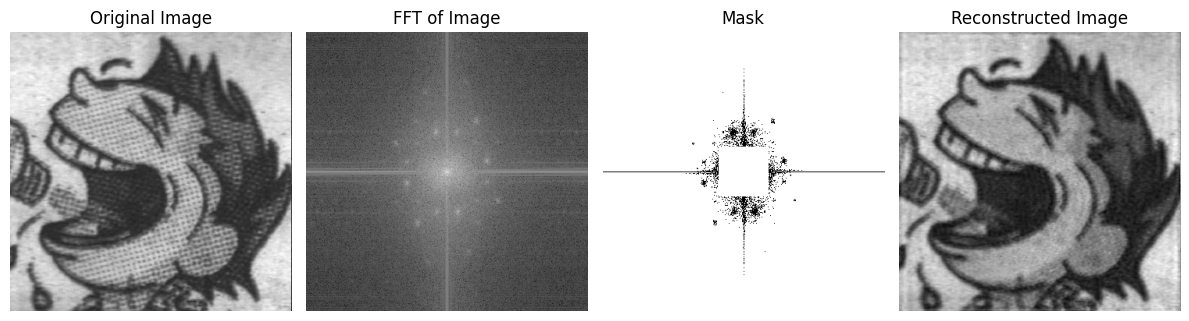

In [ ]:
cart = cv2.imread('../data/cart.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# 1. fft
ft_cart = np.fft.fft2(cart)
fshift_cart = np.fft.fftshift(ft_cart)
# plt.imshow(np.log(1 + np.abs(fshift_cart)), cmap='gray')

# 2. thresholding
cart_thr = (np.abs(fshift_cart) > 10000).astype(np.float32)
# plt.imshow(cart_thr, cmap='gray')

# 3. invert
cart_thr_inv = 1 - cart_thr
# plt.imshow(cart_thr_inv, cmap='gray')

# 4. some center points should be white. a square in the center
c_x, c_y = cart_thr.shape[0] // 2, cart_thr.shape[1] // 2
rad = 32
cart_thr_inv[c_x - rad:c_x + rad, c_y - rad:c_y + rad] = 1
# plt.imshow(cart_thr_inv, cmap='gray')


# 5. apply this as mask
mask = cart_thr_inv
fshift_cart_masked = fshift_cart * mask

# 6. ifft
f_ishift_cart = np.fft.ifftshift(fshift_cart_masked)
cart_reconstructed = np.fft.ifft2(f_ishift_cart).real
# plt.imshow(cart_reconstructed, cmap='gray')

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cart, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.log(1 + np.abs(fshift_cart)), cmap='gray')
plt.title('FFT of Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cart_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## Question 6

Vansh recently took a picture of some coins scattered on his desk but, being a bit lazy, he doesn’t feel like counting the coins manually. Your task is to help Vansh by identifying and counting the number of coins in `coin.jpg` using morphological operations. The goal is to automate the process, ensuring that Vansh never has to manually count his coins again! Use morphological operations and thresholding techniques to preprocess the image and isolate the coins Calculate the distinct number of white regions in the thresholded image to determine the number of coins present.

Approach:

1. Use a blur to reduce noise and smooth the image for better thresholding.

2. Apply binary inverse thresholding with Otsu's method to create a clear foreground-background separation.

3. Use morphological closing with an elliptical kernel to fill gaps within coin shapes.

4. Detect contours on the processed image and count them, excluding the outer boundary.

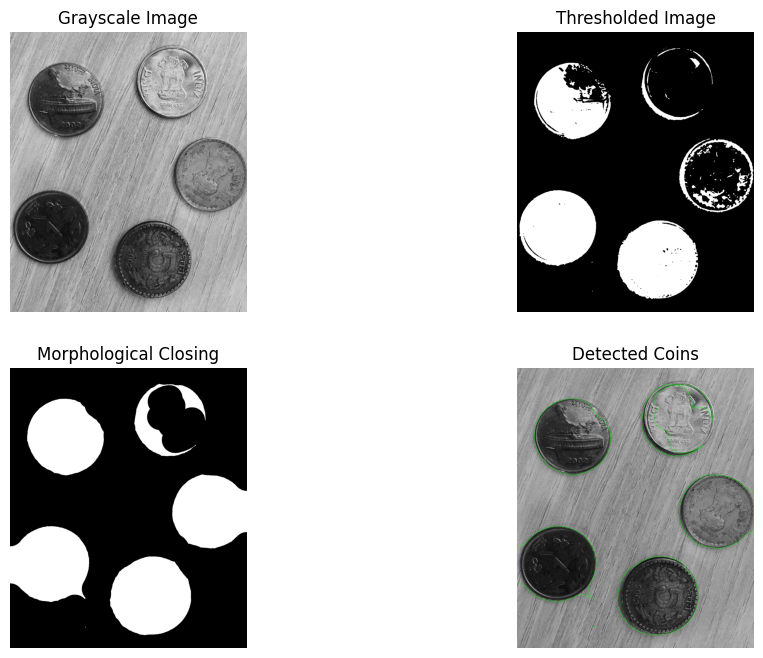

Number of coins: 5


In [ ]:
image = cv2.imread("../data/coin-detection.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gaussian blur
blurred = cv2.GaussianBlur(gray, (25, 25), 0)

# thresholding
ret, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (125, 125))
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# counting coins
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_coins = len(contours) - 1  # Subtract 1 for the outer boundary

# drawing contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(closing, cmap='gray')
plt.title('Morphological Closing')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Coins')
plt.axis('off')

plt.show()


print("Number of coins:", num_coins)

### Question 7

The human skeletal system is a fascinating and complex structure made up of numerous bones, but have you ever wondered if it’s the most efficient design? To explore this concept further, you are tasked with performing skeletonization on the `human.png`.


Approach:

1. Load the image in grayscale (using only the alpha channel) and apply binary thresholding to create a binary image.

2. Set up a cross-shaped structuring element for morphological operations.

3. Create an empty image to store the skeleton. Then perform skeletonization:
   - Perform morphological opening on the binary image.
   - Subtract the opened image from the binary to isolate skeleton segments.
   - Erode the binary image and combine it with the skeleton segments.
   - Repeat until the entire binary image is eroded to nothing.

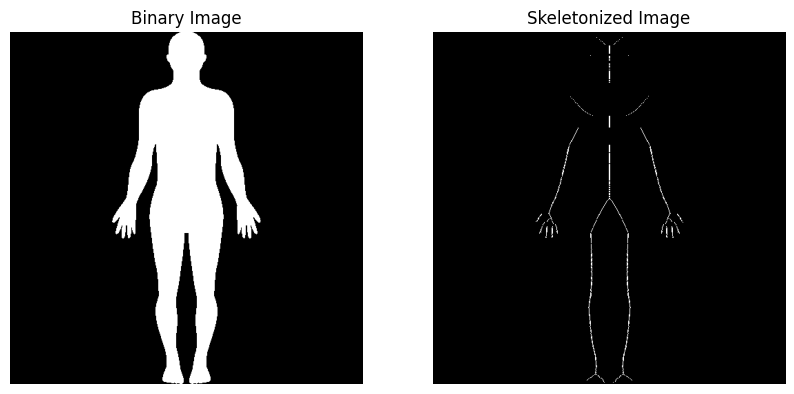

In [ ]:
skeleton = cv2.imread("../data/human.png", cv2.IMREAD_UNCHANGED)
skeleton = skeleton[:, :, 3]  # rgba

_, binary = cv2.threshold(skeleton, 127, 255, cv2.THRESH_BINARY)
original = binary.copy()

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
size = np.size(binary)
skel = np.zeros(binary.shape, np.uint8)

while True:
    open_img = cv2.morphologyEx(binary, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(binary, open_img)
    eroded = cv2.erode(binary, element)
    skel = cv2.bitwise_or(skel, temp)
    binary = eroded.copy()

    if cv2.countNonZero(binary) == 0:
        break

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skel, cmap="gray")
plt.title("Skeletonized Image")
plt.axis("off")

plt.show()

### Question 8

Vansh is trying to mark his attendance again. However, because his hands weren’t clean this time, the scanned fingerprint image contains various artifacts and noise, making it difficult for the system to process his attendance. Your task is to help Vansh by cleaning the `fingerprint2.png` and detecting the key edges needed for accurate recognition. Hint: Can explore morphological operations, gabor filter, thresholding, skeletonization.

Approach:

1. Apply erosion followed by dilation (opening operation) with an elliptical kernel to remove noise and clean the image.

2. Use a Gabor filter to enhance ridge patterns in the fingerprint for better feature extraction.

3. Normalize the Gabor-filtered image and apply Otsu's thresholding to create a binary image highlighting the ridges.

4. Skeletonization (already described previously):
   - Use morphological operations to iteratively reduce ridge patterns to single-pixel width.
   - Continue until the entire binary image is skeletonized.

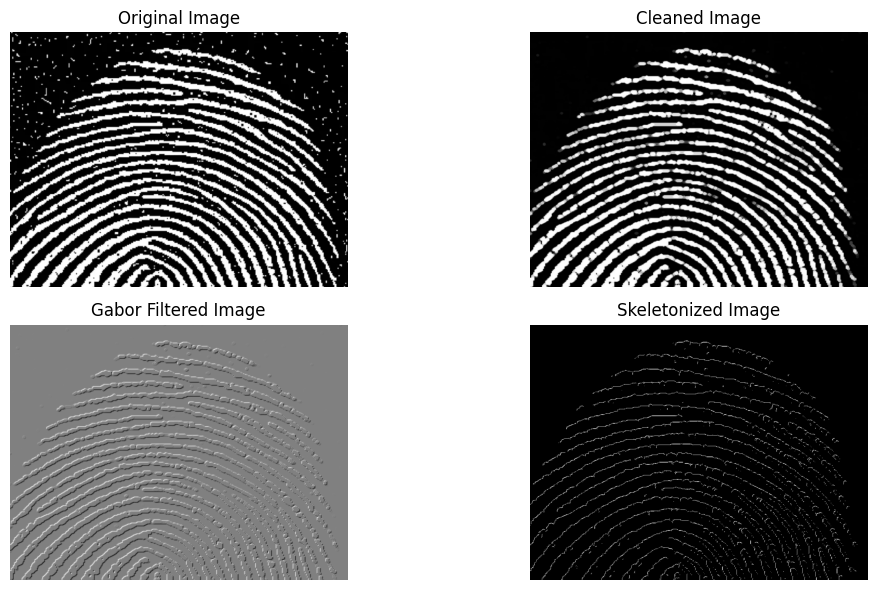

In [50]:

fingerprint2 = cv2.imread('../data/fingerprint2.png', cv2.IMREAD_GRAYSCALE)

# cleaning
size = 5

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
fingerprint2_cleaned = cv2.morphologyEx(fingerprint2, cv2.MORPH_ERODE, kernel, iterations=2)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
fingerprint2_cleaned = cv2.morphologyEx(fingerprint2_cleaned, cv2.MORPH_DILATE, kernel, iterations=2)

# gabor filter
ksize = 3
sigma = 11
theta = np.pi / 4
lambd = 10
gamma = 0.5
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)

fingerprint_gabor = cv2.filter2D(fingerprint2_cleaned, cv2.CV_64F, gabor_kernel)

fingerprint_gabor_8u = cv2.normalize(fingerprint_gabor, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# thresholding
_, fingerprint_gabor_thr = cv2.threshold(fingerprint_gabor_8u, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# skeletonizing
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
size = np.size(fingerprint_gabor_thr)

fingerprint_skel = np.zeros(fingerprint_gabor_thr.shape, np.uint8)

while True:
    open_img = cv2.morphologyEx(fingerprint_gabor_thr, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(fingerprint_gabor_thr, open_img)
    eroded = cv2.erode(fingerprint_gabor_thr, element)
    fingerprint_skel = cv2.bitwise_or(fingerprint_skel, temp)
    fingerprint_gabor_thr = eroded.copy()

    if cv2.countNonZero(fingerprint_gabor_thr) == 0:
        break

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(fingerprint2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(fingerprint2_cleaned, cmap='gray')
plt.title('Cleaned Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(fingerprint_gabor, cmap='gray')
plt.title('Gabor Filtered Image')
plt.axis('off')

# plt.subplot(2, 2, 3)
# plt.imshow(fingerprint_gabor_thr, cmap='gray')
# plt.title('Thresholded Gabor Image')
# plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(fingerprint_skel, cmap='gray')
plt.title('Skeletonized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

---